---------------------------------------------------------------
---------------------------------------------------------------

## **SYMBOLIC TOPOLOGY**
------------------------

In this section, we create the symbolic topology that captures the topological layout that we just discussed.</br>
Defining the topology is very simple. We start by importing the ```template_topology``` class and create a new instance that represents our symbolic model. Then we start adding the components we discussed earlier, starting by the bodies, then the joints, actuators and forces, and thats it.</br>
These components will be represented symbolically, and therefore there is no need for any numerical inputs at this step.

The system is stored in a form of a network graph that stores all the data needed for the assemblage of the system equations later. But even before the assemblage process, we can gain helpful insights about our system as well be shown.


In [1]:
import os
from uraeus.smbd.systems import assembly, load_pickled_data

In [2]:
database_directory = os.path.abspath('../../')
templates_dir      = os.path.join(database_directory, 'symenv', 'templates')

model_name = 'rolling_chassis_v2'

In [5]:
sym_model = assembly(model_name)

In [3]:
suspension = load_pickled_data(os.path.join(templates_dir, 'double_wishbone_bellcrank/data/dwb_bellcrank_push.stpl'))
suspension.assemble()

steering = load_pickled_data(os.path.join(templates_dir, 'rack_steering/data/rack_steering.stpl'))
steering.assemble()

chassis = load_pickled_data(os.path.join(templates_dir, 'chassis/data/chassis.stpl'))
chassis.assemble()

drive_shafts = load_pickled_data(os.path.join(templates_dir, 'drive_shafts_2/data/drive_shafts.stpl'))
drive_shafts.assemble()

### Adding Subsystems

In [6]:
sym_model.add_subsystem('AX1', suspension)
sym_model.add_subsystem('ST1', steering)

sym_model.add_subsystem('AX2', suspension)
sym_model.add_subsystem('DR2', drive_shafts)

sym_model.add_subsystem('CH', chassis)

### Mapping Virtual Bodies

In [7]:
sym_model.assign_virtual_body('AX1.vbs_chassis', 'CH.rbs_chassis')
sym_model.assign_virtual_body('AX2.vbs_chassis', 'CH.rbs_chassis')
sym_model.assign_virtual_body('ST1.vbs_chassis', 'CH.rbs_chassis')

sym_model.assign_virtual_body('DR2.vbs_differential', 'CH.rbs_chassis')
sym_model.assign_virtual_body('DR2.vbr_wheel_hub', 'AX2.rbr_hub')

sym_model.assign_virtual_body('AX1.vbr_steer', 'ST1.rbs_rack')
sym_model.assign_virtual_body('AX2.vbr_steer', 'CH.rbs_chassis')

### Assembling

In [8]:
sym_model.assemble()

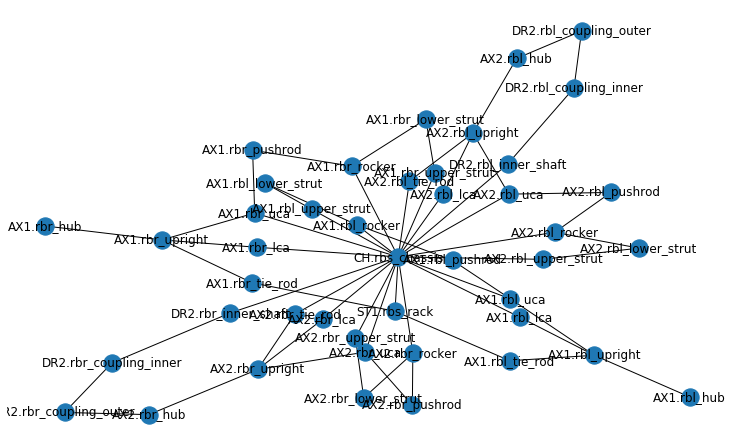

In [9]:
sym_model.draw_constraints_topology()

---------------------------------------------------------------
---------------------------------------------------------------

In [10]:
from uraeus.smbd.utilities.serialization.structural.json import assembly_encoder

In [11]:
jsonfied = assembly_encoder.generator(sym_model.topology)
jsonfied.write_JSON_file('configurations')

---------------------------------------------------------------
---------------------------------------------------------------